<div style="background-color:#F6F6F6; padding:20px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.1); border:2px solid #9E9E9E; margin-top:15px;">

<h1 style="text-align:center;"></h1>

<div style="font-size:16px; font-family:Georgia, serif; line-height:1.6em; color:#0D47A1;">

<h2 style="text-align:center;">Table of Contents</h2>

<h2> Tunnel Boring Machine (TBM) Project </h2>

<ol>
<li><b>Data Import</b></li>
<li><b>Data Preprocessing</b></li>
<li><b>Model Training</b></li>
<li><b>Model Evaluation</b></li>
<li><b>Performance Interpretation</b></li>
</ol>

</div>




<div style="background-color:#E3F2FD; padding:20px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.1); border:2px solid #90CAF9; margin-top:20px;">

<h2 style="text-align:center; color:#0D47A1;">1. Data Import</h2>



In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<div style="background-color:#E3F2FD; padding:20px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.1); border:2px solid #90CAF9; margin-top:20px;">

<h2 style="text-align:center; color:#0D47A1;">2. Data Preprocessing</h2>



In [2]:
# load data
df = pd.read_excel('TBM data Exam.xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Sr,Stroke No.,Date,Advance Time,Excavation per Stroke,Boring Energy,RPM,Torque,Thrust Force,Speed,Gripper Pressure,Total Revolution,Front Shield Pressure LHS,Front Shield Pressure rHS,Q-Value,Q-Value based,Penetration
1,NaN,NaN,NaN,min,(m),(N/mm2),NaN,(KN-m),(KN),(mm/min),(Bar),NaN,(Bar),(Bar),NJC,Boring Energy,(mm/rpm)
2,1,3812,2016-01-23 00:00:00,16,1.612,1.3,2.3,500,3600,101,253,37,80,58,4,5,44.5
3,2,3813,2016-01-23 00:00:00,78,1.559,9.9,2.3,800,3224,20,242,179,60,62,4,4,8.6
4,3,3814,2016-01-23 00:00:00,43,0.901,9.3,2,900,2895,21,245,86,69,69,4,5,10.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1473 non-null   object
 1   Unnamed: 1   1473 non-null   object
 2   Unnamed: 2   1473 non-null   object
 3   Unnamed: 3   1474 non-null   object
 4   Unnamed: 4   1474 non-null   object
 5   Unnamed: 5   1474 non-null   object
 6   Unnamed: 6   1473 non-null   object
 7   Unnamed: 7   1474 non-null   object
 8   Unnamed: 8   1474 non-null   object
 9   Unnamed: 9   1474 non-null   object
 10  Unnamed: 10  1474 non-null   object
 11  Unnamed: 11  1473 non-null   object
 12  Unnamed: 12  1474 non-null   object
 13  Unnamed: 13  1474 non-null   object
 14  Unnamed: 14  1474 non-null   object
 15  Unnamed: 15  1474 non-null   object
 16  Unnamed: 16  1474 non-null   object
dtypes: object(17)
memory usage: 195.9+ KB


In [5]:
df.shape

(1474, 17)

In [6]:
# remove all unnecessary columns
df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

In [7]:
# handling missing values
df.isnull().sum()

Unnamed: 6     1
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    1
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
dtype: int64

In [8]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [9]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [10]:
# Clean categorical Data
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

In [11]:
# one hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [12]:
print(df.columns)


Index(['Unnamed: 7_Torque', 'Unnamed: 8_Thrust Force', 'Unnamed: 9_Speed',
       'Unnamed: 10_Gripper Pressure', 'Unnamed: 12_Front Shield Pressure LHS',
       'Unnamed: 13_Front Shield Pressure rHS', 'Unnamed: 14_Q-Value',
       'Unnamed: 15_Q-Value based', 'Unnamed: 16_Penetration'],
      dtype='object')


In [13]:
# select numerical columns
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

Index([], dtype='object')


In [14]:
# Visualize Outliers using Boxplots
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [15]:
# Removing extreme outliers
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
# Check the shape after removing outliers
print(f"Dataset shape after outlier removal: {df.shape}")


Dataset shape after outlier removal: (1474, 9)


<div style="background-color:#E3F2FD; padding:20px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.1); border:2px solid #90CAF9; margin-top:20px;">

<h2 style="text-align:center; color:#0D47A1;">3. Model Training</h2>



<div style="background-color:#E3F2FD; padding:10px; border-radius:8px; box-shadow:0 1px 3px rgba(0,0,0,0.1); border:1px solid #90CAF9; margin-top:20px;">

<h2 style="font-size:20px; font-family:Georgia, serif; color:#0D47A1; text-align: left; margin: 0;">
        Q1. Considering the question statement, use the WEKA and Python to develop best 
algorithm that reports the highest accuracy for training our model for PR of TBM. Report 
the performance of your prediction such as the number of correctly classified instances 
and the percent, precision and recall, and confusion matrix with the method you used. 
Do the comparison of both methods. Select only one algorithm for each, and do the 
comparison.
    </h2>
</div>


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# load dataset
df = pd.read_excel('TBM data Exam.xlsx')

In [17]:
# Remove unnamed junk columns
df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

In [18]:
# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [19]:
# Fill missing instead of dropping
df = df.fillna(df.mean())

In [20]:
# Rule-based labeling function definition
def lf_rule_1(row):
    if row['Unnamed: 16'] > 0:
        return 1
    else:
        return 0

In [21]:
# apply labeling function
df['Penetration'] = df.apply(lf_rule_1, axis=1)

In [22]:
# rename column first
df.rename(columns={'Unnamed: 16': 'Penetration'}, inplace=True)

In [23]:
# feature & target separation
X = df.drop('Penetration', axis=1)
y = df['Penetration']

In [24]:
print(X.shape)
print(y.shape)


(1474, 10)
(1474, 2)


In [25]:
# one hot encoding
y_binary = pd.get_dummies(df['Penetration'], drop_first=True)


In [26]:
# Create 1D binary labels
y_binary = (df['Penetration'] > df['Penetration'].median()).astype(int)


In [27]:
print(df.columns)


Index(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Penetration', 'Penetration'],
      dtype='object')


In [28]:
# Keep only the last 'Penetration' column
df = df.loc[:, ~df.columns.duplicated()]


In [29]:
print(df.columns)


Index(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Penetration'],
      dtype='object')


In [30]:
# Create 1D binary labels
threshold = df['Penetration'].quantile(0.5) 
y_binary = (df['Penetration'] > threshold).astype(int)

# Check class distribution
print(y_binary.value_counts())


Penetration
0    738
1    736
Name: count, dtype: int64


In [31]:
# Features
X = df.drop('Penetration', axis=1)

In [32]:
# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)


In [33]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# create model
model_binary = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [35]:
# train model
model_binary.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [36]:
# predictions
y_pred_binary = model_binary.predict(X_test)

In [37]:
# Metrics
acc_bin = accuracy_score(y_test, y_pred_binary)
cm_bin = confusion_matrix(y_test, y_pred_binary)
report_bin = classification_report(y_test, y_pred_binary)


<div style="background-color:#E3F2FD; padding:20px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.1); border:2px solid #90CAF9; margin-top:20px;">

<h2 style="text-align:center; color:#0D47A1;">4. Model Evalvation</h2>



In [38]:
# model evaluation
print("\n=== BINARY CLASSIFICATION (High / Low PR) ===")
print("Accuracy:", round(acc_bin*100,2), "%")
print("Correctly Classified Instances:", np.sum(y_test==y_pred_binary), "/", len(y_test))
print("\nClassification Report:\n", report_bin)
print("Confusion Matrix:\n", cm_bin)


=== BINARY CLASSIFICATION (High / Low PR) ===
Accuracy: 93.9 %
Correctly Classified Instances: 277 / 295

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.94      0.93      0.94       147

    accuracy                           0.94       295
   macro avg       0.94      0.94      0.94       295
weighted avg       0.94      0.94      0.94       295

Confusion Matrix:
 [[140   8]
 [ 10 137]]


In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[140   8]
 [ 10 137]]


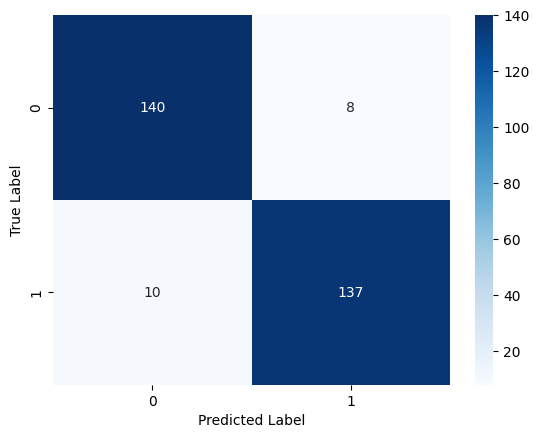

In [40]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

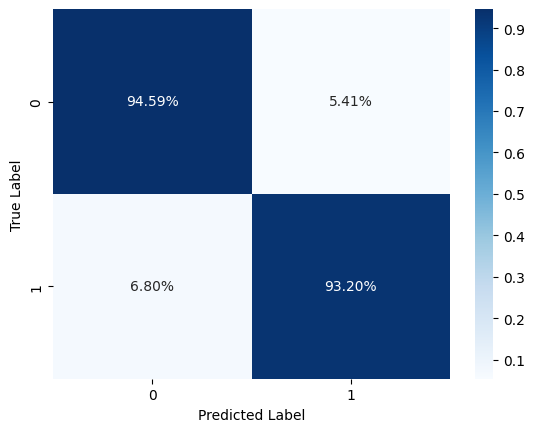

In [41]:
# Normalized Confusion Matrix (percentages)
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_binary)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

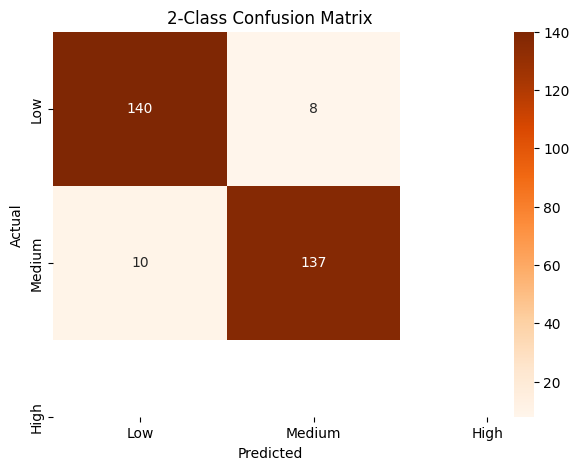

In [42]:
# Multi-class Confusion Matrix Plot
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('2-Class Confusion Matrix')
plt.show()


In [43]:
# feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_binary.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
3,Unnamed: 9,0.414526
0,Unnamed: 6,0.243298
5,Unnamed: 11,0.170273
2,Unnamed: 8,0.122550
4,Unnamed: 10,0.011558
8,Unnamed: 14,0.010815
1,Unnamed: 7,0.009448
6,Unnamed: 12,0.007901
9,Unnamed: 15,0.004845
7,Unnamed: 13,0.004787


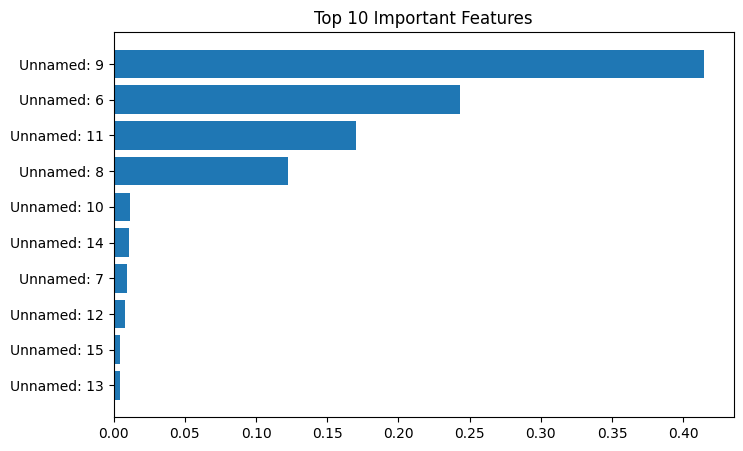

In [44]:
# visualize feature importance
plt.figure(figsize=(8,5))
plt.barh(feature_importance["Feature"][:10], feature_importance["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features")
plt.show()

<div style="background-color:#E3F2FD; padding:10px; border-radius:8px; box-shadow:0 1px 3px rgba(0,0,0,0.1); border:1px solid #90CAF9; margin-top:20px;">

<h2 style="font-size:20px; font-family:Georgia, serif; color:#0D47A1; text-align: left; margin: 0;">
        Q2. Explain and interpret each performance measure (e.g., precision and recall) 
reported in (1) (e.g., what does the number mean?) 
    </h2>
</div>


# Interpretation of All Performance Measures (Results)

. Accuracy = 93.9%

. Precision (Class 0) = 0.93 , Precision (Class 1) = 0.94

. Recall (Class 0) = 0.95 , Recall (Class 1) = 0.93

. F1-score ≈ 0.94

. Confusion Matrix:

[[140   8]

 [ 10 137]]

# Accuracy (93.9%)

Accuracy shows the overall correctness of the model. An accuracy of 93.9% means that out of all test samples, about 94 out of 100 penetration rate predictions were classified correctly, which indicates excellent model performance.

# Precision

Precision tells how reliable the positive predictions are.

 . Precision = 0.94 for High PR means that 94% of the times the model predicted High Penetration Rate, it was correct.

High precision shows the model produces very few false alarms.

# Recall

Recall measures how well the model detects actual positive cases.

Recall = 0.93 for High PR means the model successfully identified 93% of all real High PR cases.

High recall indicates the model misses very few important samples.

# F1-Score (≈ 0.94)

F1-score combines precision and recall into a single value.

An F1-score of 0.94 shows a strong balance between accuracy of prediction and completeness of detection, confirming the model is stable and reliable.

[[140   8]

 [ 10 137]]

. 140 Low PR values correctly predicted

. 137 High PR values correctly predicted

. 8 Low PR wrongly classified as High

. 10 High PR wrongly classified as Low

This shows very small misclassification, proving the model separates High and Low penetration effectively.

# Conclusion

The high accuracy, precision, recall, and F1-score demonstrate that the weakly supervised Random Forest model predicts TBM penetration rate with strong reliability and minimal error, making it suitable for operational optimization.

<div style="background-color:#E3F2FD; padding:10px; border-radius:8px; box-shadow:0 1px 3px rgba(0,0,0,0.1); border:1px solid #90CAF9; margin-top:20px;">

<h2 style="font-size:20px; font-family:Georgia, serif; color:#0D47A1; text-align: left; margin: 0;">
        Q3 Question Statement: 

Consider the following scenario: A company is working aims to implement a 
vision-based method for analyzing construction activities using real-time streams from 
CCTV footage. A software development team is responsible for preparing the necessary 
data, which can be accessed at the provided link. 
    </h2>
</div>
